In [1]:
from environments import OneDCleanupEnv
import numpy as np
import torch
from agents import OneDUCoordinator
from tqdm import tqdm
import matplotlib.pyplot as plt

2023-12-04 21:09:06,001	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda available: {torch.cuda.is_available()}")
np.set_printoptions(threshold=np.inf)

cuda available: False


In [3]:
num_agents = 10
reward_multiplier = 10

# for printing options
pp = False
verbose = False
verbose_episode = 200  # start printing at which epoch

In [4]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10
division_ep = 1e-7

In [5]:
gamma = 0.999
epsilon = 1.0
epsilon_decay = 0.99995
epsilon_min = 0.1
lr = 0.0001
batch_size = 8

In [6]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]

In [7]:
state_dim = 4
num_roles = 2

In [8]:
env = OneDCleanupEnv(agent_ids=agent_ids, 
                      num_agents=num_agents, 
                      thresholdDepletion=thresholdDepletion,
                        thresholdRestoration=thresholdRestoration,
                        wasteSpawnProbability=wasteSpawnProbability,
                        appleRespawnProbability=appleRespawnProbability,
                        dirt_multiplier=dirt_multiplier,
                        area=150)

agentCoordinator = OneDUCoordinator(device=device,
                                    env=env,
                                    num_agents=num_agents,
                                    num_roles=num_roles,
                                    buffer_size=4000,
                                    batch_size=batch_size,
                                    lr=lr,
                                    gamma=gamma,
                                    epsilon=epsilon,
                                    epsilon_decay=epsilon_decay,
                                    epsilon_min=epsilon_min,
                                    u_layers=[
                                        (state_dim, 256),
                                        (256, 128),
                                        (128, 64),
                                        (64, 1)
                                    ])

In [9]:
ending_ep_rewards = []
num_episodes = 100
steps_per_epsiode = 1000

In [10]:
max_reward = 0
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    state = states["coordinator"]

    #print(f"info: {info}")

    for step in tqdm(range(steps_per_epsiode)):
        num_cleaners, num_pickers = agentCoordinator.generate_roles()
        assignments = env.get_greedy_assignments(num_pickers, num_cleaners)
        actions = env.get_greedy_actions(assignments)
        next_states, rewards, dones, _, info = env.step(actions)
        next_state = next_states["coordinator"]
        reward = sum(rewards.values())

        agentCoordinator.step(state, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    print(f"ending reward: {ending_reward}")
    print(f"========= End of Episode {episode} =========")

    ending_ep_rewards.append(ending_reward)

    agentCoordinator.scheduler.step()

    if ending_reward > max_reward:
        max_reward = ending_reward

========= Episode 0 =========


100%|█████████▉| 999/1000 [00:01<00:00, 507.46it/s]


ending reward: 2548
========= End of Episode 0 =========
========= Episode 1 =========


100%|█████████▉| 999/1000 [00:01<00:00, 560.01it/s]


ending reward: 2523
========= End of Episode 1 =========
========= Episode 2 =========


100%|█████████▉| 999/1000 [00:02<00:00, 474.99it/s]


ending reward: 2488
========= End of Episode 2 =========
========= Episode 3 =========


100%|█████████▉| 999/1000 [00:02<00:00, 408.73it/s]


ending reward: 2381
========= End of Episode 3 =========
========= Episode 4 =========


100%|█████████▉| 999/1000 [00:02<00:00, 438.13it/s]


ending reward: 2503
========= End of Episode 4 =========
========= Episode 5 =========


100%|█████████▉| 999/1000 [00:02<00:00, 386.63it/s]


ending reward: 2733
========= End of Episode 5 =========
========= Episode 6 =========


100%|█████████▉| 999/1000 [00:02<00:00, 366.85it/s]


ending reward: 2638
========= End of Episode 6 =========
========= Episode 7 =========


100%|█████████▉| 999/1000 [00:02<00:00, 347.46it/s]


ending reward: 2621
========= End of Episode 7 =========
========= Episode 8 =========


100%|█████████▉| 999/1000 [00:02<00:00, 352.72it/s]


ending reward: 2578
========= End of Episode 8 =========
========= Episode 9 =========


100%|█████████▉| 999/1000 [00:03<00:00, 280.18it/s]


ending reward: 2635
========= End of Episode 9 =========
========= Episode 10 =========


100%|█████████▉| 999/1000 [00:03<00:00, 295.84it/s]


ending reward: 2326
========= End of Episode 10 =========
========= Episode 11 =========


100%|█████████▉| 999/1000 [00:03<00:00, 293.53it/s]


ending reward: 2656
========= End of Episode 11 =========
========= Episode 12 =========


100%|█████████▉| 999/1000 [00:03<00:00, 268.72it/s]


ending reward: 2590
========= End of Episode 12 =========
========= Episode 13 =========


100%|█████████▉| 999/1000 [00:03<00:00, 278.35it/s]


ending reward: 2703
========= End of Episode 13 =========
========= Episode 14 =========


100%|█████████▉| 999/1000 [00:03<00:00, 269.18it/s]


ending reward: 2555
========= End of Episode 14 =========
========= Episode 15 =========


100%|█████████▉| 999/1000 [00:03<00:00, 254.99it/s]


ending reward: 2672
========= End of Episode 15 =========
========= Episode 16 =========


100%|█████████▉| 999/1000 [00:03<00:00, 260.87it/s]


ending reward: 2612
========= End of Episode 16 =========
========= Episode 17 =========


100%|█████████▉| 999/1000 [00:03<00:00, 261.11it/s]


ending reward: 2654
========= End of Episode 17 =========
========= Episode 18 =========


100%|█████████▉| 999/1000 [00:04<00:00, 244.57it/s]


ending reward: 2670
========= End of Episode 18 =========
========= Episode 19 =========


100%|█████████▉| 999/1000 [00:04<00:00, 222.73it/s]


ending reward: 2744
========= End of Episode 19 =========
========= Episode 20 =========


100%|█████████▉| 999/1000 [00:04<00:00, 238.74it/s]


ending reward: 2634
========= End of Episode 20 =========
========= Episode 21 =========


100%|█████████▉| 999/1000 [00:04<00:00, 215.23it/s]


ending reward: 2661
========= End of Episode 21 =========
========= Episode 22 =========


100%|█████████▉| 999/1000 [00:04<00:00, 224.93it/s]


ending reward: 2790
========= End of Episode 22 =========
========= Episode 23 =========


100%|█████████▉| 999/1000 [00:04<00:00, 219.92it/s]


ending reward: 2845
========= End of Episode 23 =========
========= Episode 24 =========


100%|█████████▉| 999/1000 [00:04<00:00, 219.23it/s]


ending reward: 2088
========= End of Episode 24 =========
========= Episode 25 =========


100%|█████████▉| 999/1000 [00:04<00:00, 215.02it/s]


ending reward: 2796
========= End of Episode 25 =========
========= Episode 26 =========


100%|█████████▉| 999/1000 [00:04<00:00, 211.51it/s]


ending reward: 2247
========= End of Episode 26 =========
========= Episode 27 =========


100%|█████████▉| 999/1000 [00:04<00:00, 211.73it/s]


ending reward: 2671
========= End of Episode 27 =========
========= Episode 28 =========


100%|█████████▉| 999/1000 [00:04<00:00, 211.94it/s]


ending reward: 2745
========= End of Episode 28 =========
========= Episode 29 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.15it/s]


ending reward: 2652
========= End of Episode 29 =========
========= Episode 30 =========


100%|█████████▉| 999/1000 [00:04<00:00, 203.07it/s]


ending reward: 2827
========= End of Episode 30 =========
========= Episode 31 =========


100%|█████████▉| 999/1000 [00:04<00:00, 202.68it/s]


ending reward: 2205
========= End of Episode 31 =========
========= Episode 32 =========


100%|█████████▉| 999/1000 [00:05<00:00, 195.87it/s]


ending reward: 2687
========= End of Episode 32 =========
========= Episode 33 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.47it/s]


ending reward: 2646
========= End of Episode 33 =========
========= Episode 34 =========


100%|█████████▉| 999/1000 [00:05<00:00, 181.31it/s]


ending reward: 2920
========= End of Episode 34 =========
========= Episode 35 =========


100%|█████████▉| 999/1000 [00:05<00:00, 189.09it/s]


ending reward: 2684
========= End of Episode 35 =========
========= Episode 36 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.25it/s]


ending reward: 1890
========= End of Episode 36 =========
========= Episode 37 =========


100%|█████████▉| 999/1000 [00:05<00:00, 181.01it/s]


ending reward: 2458
========= End of Episode 37 =========
========= Episode 38 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.38it/s]


ending reward: 2251
========= End of Episode 38 =========
========= Episode 39 =========


100%|█████████▉| 999/1000 [00:05<00:00, 194.25it/s]


ending reward: 2471
========= End of Episode 39 =========
========= Episode 40 =========


100%|█████████▉| 999/1000 [00:05<00:00, 174.09it/s]


ending reward: 2512
========= End of Episode 40 =========
========= Episode 41 =========


100%|█████████▉| 999/1000 [00:05<00:00, 184.77it/s]


ending reward: 2621
========= End of Episode 41 =========
========= Episode 42 =========


100%|█████████▉| 999/1000 [00:05<00:00, 187.13it/s]


ending reward: 2853
========= End of Episode 42 =========
========= Episode 43 =========


100%|█████████▉| 999/1000 [00:05<00:00, 182.33it/s]


ending reward: 3106
========= End of Episode 43 =========
========= Episode 44 =========


100%|█████████▉| 999/1000 [00:05<00:00, 184.62it/s]


ending reward: 2935
========= End of Episode 44 =========
========= Episode 45 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.66it/s]


ending reward: 2764
========= End of Episode 45 =========
========= Episode 46 =========


100%|█████████▉| 999/1000 [00:05<00:00, 177.53it/s]


ending reward: 2725
========= End of Episode 46 =========
========= Episode 47 =========


100%|█████████▉| 999/1000 [00:05<00:00, 172.01it/s]


ending reward: 2798
========= End of Episode 47 =========
========= Episode 48 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.06it/s]


ending reward: 2699
========= End of Episode 48 =========
========= Episode 49 =========


100%|█████████▉| 999/1000 [00:05<00:00, 172.37it/s]


ending reward: 2924
========= End of Episode 49 =========
========= Episode 50 =========


100%|█████████▉| 999/1000 [00:05<00:00, 180.49it/s]


ending reward: 2621
========= End of Episode 50 =========
========= Episode 51 =========


100%|█████████▉| 999/1000 [00:05<00:00, 178.35it/s]


ending reward: 2844
========= End of Episode 51 =========
========= Episode 52 =========


100%|█████████▉| 999/1000 [00:05<00:00, 180.25it/s]


ending reward: 2843
========= End of Episode 52 =========
========= Episode 53 =========


100%|█████████▉| 999/1000 [00:05<00:00, 187.08it/s]


ending reward: 2700
========= End of Episode 53 =========
========= Episode 54 =========


100%|█████████▉| 999/1000 [00:05<00:00, 173.61it/s]


ending reward: 2899
========= End of Episode 54 =========
========= Episode 55 =========


100%|█████████▉| 999/1000 [00:05<00:00, 170.53it/s]


ending reward: 2814
========= End of Episode 55 =========
========= Episode 56 =========


100%|█████████▉| 999/1000 [00:05<00:00, 171.55it/s]


ending reward: 2935
========= End of Episode 56 =========
========= Episode 57 =========


100%|█████████▉| 999/1000 [00:05<00:00, 174.20it/s]


ending reward: 2811
========= End of Episode 57 =========
========= Episode 58 =========


100%|█████████▉| 999/1000 [00:05<00:00, 176.21it/s]


ending reward: 2282
========= End of Episode 58 =========
========= Episode 59 =========


100%|█████████▉| 999/1000 [00:05<00:00, 177.54it/s]


ending reward: 2777
========= End of Episode 59 =========
========= Episode 60 =========


100%|█████████▉| 999/1000 [00:05<00:00, 181.26it/s]


ending reward: 2936
========= End of Episode 60 =========
========= Episode 61 =========


100%|█████████▉| 999/1000 [00:05<00:00, 178.25it/s]


ending reward: 2714
========= End of Episode 61 =========
========= Episode 62 =========


100%|█████████▉| 999/1000 [00:05<00:00, 175.48it/s]


ending reward: 3079
========= End of Episode 62 =========
========= Episode 63 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.84it/s]


ending reward: 2744
========= End of Episode 63 =========
========= Episode 64 =========


100%|█████████▉| 999/1000 [00:05<00:00, 188.59it/s]


ending reward: 2746
========= End of Episode 64 =========
========= Episode 65 =========


100%|█████████▉| 999/1000 [00:05<00:00, 187.44it/s]


ending reward: 2225
========= End of Episode 65 =========
========= Episode 66 =========


100%|█████████▉| 999/1000 [00:05<00:00, 180.54it/s]


ending reward: 2905
========= End of Episode 66 =========
========= Episode 67 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.75it/s]


ending reward: 2820
========= End of Episode 67 =========
========= Episode 68 =========


100%|█████████▉| 999/1000 [00:05<00:00, 168.89it/s]


ending reward: 2877
========= End of Episode 68 =========
========= Episode 69 =========


100%|█████████▉| 999/1000 [00:05<00:00, 173.98it/s]


ending reward: 2890
========= End of Episode 69 =========
========= Episode 70 =========


100%|█████████▉| 999/1000 [00:05<00:00, 176.54it/s]


ending reward: 2929
========= End of Episode 70 =========
========= Episode 71 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.15it/s]


ending reward: 2669
========= End of Episode 71 =========
========= Episode 72 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.31it/s]


ending reward: 2904
========= End of Episode 72 =========
========= Episode 73 =========


100%|█████████▉| 999/1000 [00:05<00:00, 182.61it/s]


ending reward: 2885
========= End of Episode 73 =========
========= Episode 74 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.87it/s]


ending reward: 2955
========= End of Episode 74 =========
========= Episode 75 =========


100%|█████████▉| 999/1000 [00:05<00:00, 180.98it/s]


ending reward: 2715
========= End of Episode 75 =========
========= Episode 76 =========


100%|█████████▉| 999/1000 [00:05<00:00, 172.61it/s]


ending reward: 2843
========= End of Episode 76 =========
========= Episode 77 =========


100%|█████████▉| 999/1000 [00:05<00:00, 174.04it/s]


ending reward: 2954
========= End of Episode 77 =========
========= Episode 78 =========


100%|█████████▉| 999/1000 [00:05<00:00, 172.46it/s]


ending reward: 2938
========= End of Episode 78 =========
========= Episode 79 =========


100%|█████████▉| 999/1000 [00:05<00:00, 175.26it/s]


ending reward: 2850
========= End of Episode 79 =========
========= Episode 80 =========


100%|█████████▉| 999/1000 [00:05<00:00, 179.67it/s]


ending reward: 3029
========= End of Episode 80 =========
========= Episode 81 =========


100%|█████████▉| 999/1000 [00:05<00:00, 178.84it/s]


ending reward: 2744
========= End of Episode 81 =========
========= Episode 82 =========


100%|█████████▉| 999/1000 [00:05<00:00, 188.23it/s]


ending reward: 2820
========= End of Episode 82 =========
========= Episode 83 =========


100%|█████████▉| 999/1000 [00:05<00:00, 177.91it/s]


ending reward: 2620
========= End of Episode 83 =========
========= Episode 84 =========


100%|█████████▉| 999/1000 [00:05<00:00, 183.03it/s]


ending reward: 2832
========= End of Episode 84 =========
========= Episode 85 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.84it/s]


ending reward: 2961
========= End of Episode 85 =========
========= Episode 86 =========


100%|█████████▉| 999/1000 [00:05<00:00, 173.32it/s]


ending reward: 2890
========= End of Episode 86 =========
========= Episode 87 =========


100%|█████████▉| 999/1000 [00:05<00:00, 178.86it/s]


ending reward: 2869
========= End of Episode 87 =========
========= Episode 88 =========


100%|█████████▉| 999/1000 [00:05<00:00, 181.65it/s]


ending reward: 2959
========= End of Episode 88 =========
========= Episode 89 =========


100%|█████████▉| 999/1000 [00:05<00:00, 176.66it/s]


ending reward: 2872
========= End of Episode 89 =========
========= Episode 90 =========


100%|█████████▉| 999/1000 [00:05<00:00, 171.92it/s]


ending reward: 2652
========= End of Episode 90 =========
========= Episode 91 =========


100%|█████████▉| 999/1000 [00:05<00:00, 171.44it/s]


ending reward: 2704
========= End of Episode 91 =========
========= Episode 92 =========


100%|█████████▉| 999/1000 [00:05<00:00, 183.44it/s]


ending reward: 2582
========= End of Episode 92 =========
========= Episode 93 =========


100%|█████████▉| 999/1000 [00:05<00:00, 180.26it/s]


ending reward: 2966
========= End of Episode 93 =========
========= Episode 94 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.88it/s]


ending reward: 2798
========= End of Episode 94 =========
========= Episode 95 =========


100%|█████████▉| 999/1000 [00:05<00:00, 183.91it/s]


ending reward: 3123
========= End of Episode 95 =========
========= Episode 96 =========


100%|█████████▉| 999/1000 [00:05<00:00, 186.22it/s]


ending reward: 2852
========= End of Episode 96 =========
========= Episode 97 =========


100%|█████████▉| 999/1000 [00:05<00:00, 184.38it/s]


ending reward: 2741
========= End of Episode 97 =========
========= Episode 98 =========


100%|█████████▉| 999/1000 [00:05<00:00, 179.73it/s]


ending reward: 2965
========= End of Episode 98 =========
========= Episode 99 =========


100%|█████████▉| 999/1000 [00:05<00:00, 183.20it/s]

ending reward: 2666
========= End of Episode 99 =========


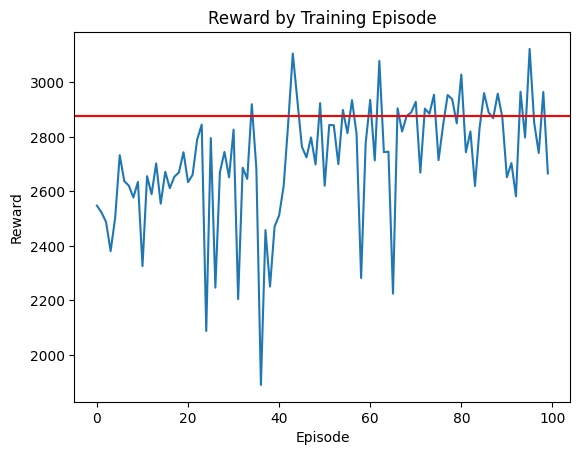

In [11]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2875.1, color='r', linestyle='-')
plt.show()

In [12]:
num_test_episodes=15
test_stats = []
for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })
    
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    state = states["coordinator"]
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #print(f"info: {info}")

    for step in tqdm(range(steps_per_epsiode)):
        num_cleaners, num_pickers = agentCoordinator.generate_roles()
        assignments = env.get_greedy_assignments(num_pickers, num_cleaners)
        actions = env.get_greedy_actions(assignments)
        next_states, reward, dones, _, info = env.step(actions)
        next_state = next_states["coordinator"]
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])

        state = next_state

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = ending_reward

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")



========= Episode 0 =========


100%|█████████▉| 999/1000 [00:04<00:00, 239.02it/s]


ending reward: 2592
========= End of Episode 0 =========
========= Episode 1 =========


100%|█████████▉| 999/1000 [00:04<00:00, 231.78it/s]


ending reward: 2686
========= End of Episode 1 =========
========= Episode 2 =========


100%|█████████▉| 999/1000 [00:04<00:00, 248.90it/s]


ending reward: 2567
========= End of Episode 2 =========
========= Episode 3 =========


100%|█████████▉| 999/1000 [00:04<00:00, 227.98it/s]


ending reward: 2500
========= End of Episode 3 =========
========= Episode 4 =========


100%|█████████▉| 999/1000 [00:04<00:00, 245.41it/s]


ending reward: 2528
========= End of Episode 4 =========
========= Episode 5 =========


100%|█████████▉| 999/1000 [00:04<00:00, 244.99it/s]


ending reward: 2562
========= End of Episode 5 =========
========= Episode 6 =========


100%|█████████▉| 999/1000 [00:04<00:00, 244.73it/s]


ending reward: 2508
========= End of Episode 6 =========
========= Episode 7 =========


100%|█████████▉| 999/1000 [00:04<00:00, 239.77it/s]


ending reward: 2532
========= End of Episode 7 =========
========= Episode 8 =========


100%|█████████▉| 999/1000 [00:04<00:00, 230.82it/s]


ending reward: 2430
========= End of Episode 8 =========
========= Episode 9 =========


100%|█████████▉| 999/1000 [00:04<00:00, 207.99it/s]


ending reward: 2592
========= End of Episode 9 =========
========= Episode 10 =========


100%|█████████▉| 999/1000 [00:04<00:00, 229.75it/s]


ending reward: 2558
========= End of Episode 10 =========
========= Episode 11 =========


100%|█████████▉| 999/1000 [00:04<00:00, 244.04it/s]


ending reward: 2596
========= End of Episode 11 =========
========= Episode 12 =========


100%|█████████▉| 999/1000 [00:04<00:00, 229.93it/s]


ending reward: 2522
========= End of Episode 12 =========
========= Episode 13 =========


100%|█████████▉| 999/1000 [00:04<00:00, 237.86it/s]


ending reward: 2584
========= End of Episode 13 =========
========= Episode 14 =========


100%|█████████▉| 999/1000 [00:04<00:00, 244.73it/s]

ending reward: 2609
========= End of Episode 14 =========


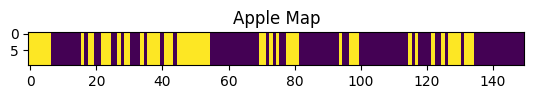

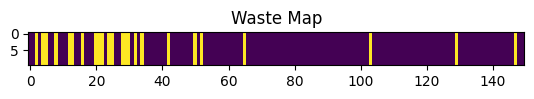

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:442: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  apple_agent_map[np.where(apple_agent_map == id)] = 1


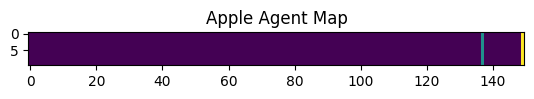

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:452: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  waste_agent_map[np.where(waste_agent_map == id)] = 1


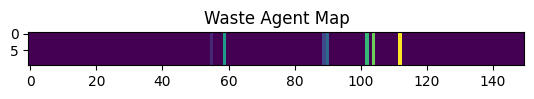

In [13]:
env.render()

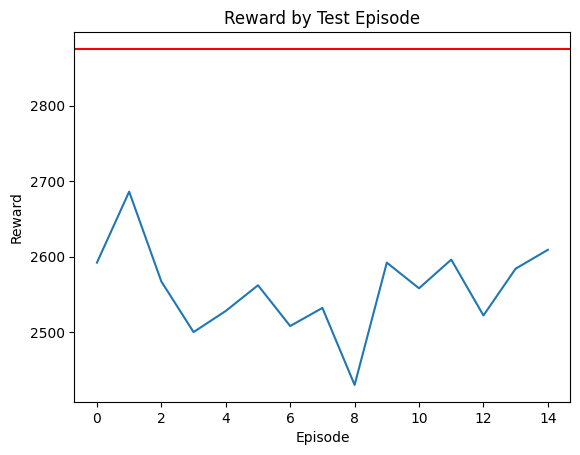

Average reward: 2557.733333333333


In [14]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2875.1, color='r', linestyle='-')
plt.show()
print(f"Average reward: {np.mean([stat['total_reward'] for stat in test_stats])}")

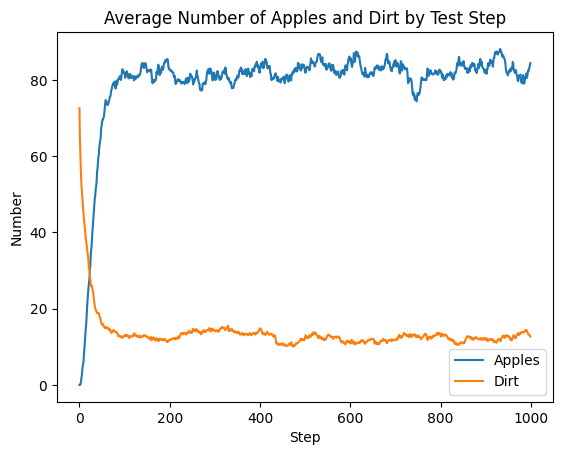

In [15]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(steps_per_epsiode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

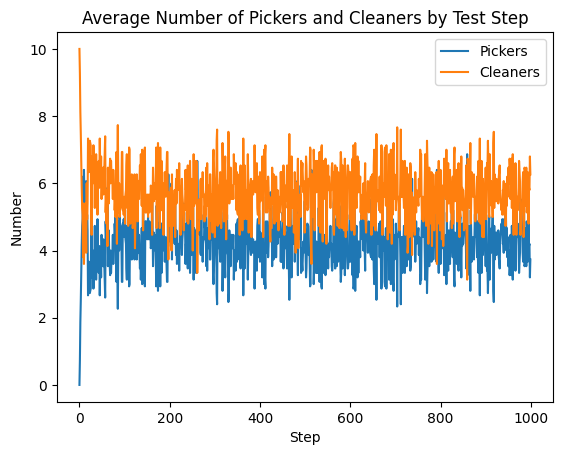

In [16]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(steps_per_epsiode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

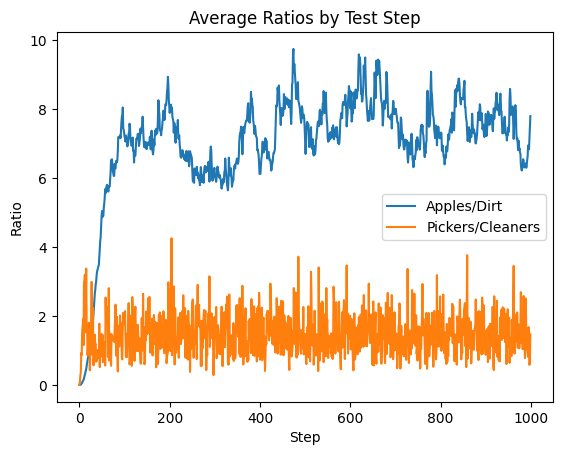

In [19]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(steps_per_epsiode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()

average picker cleaner ratio 1.5177243142724313
average apple dirt ratio 7.353234183509619


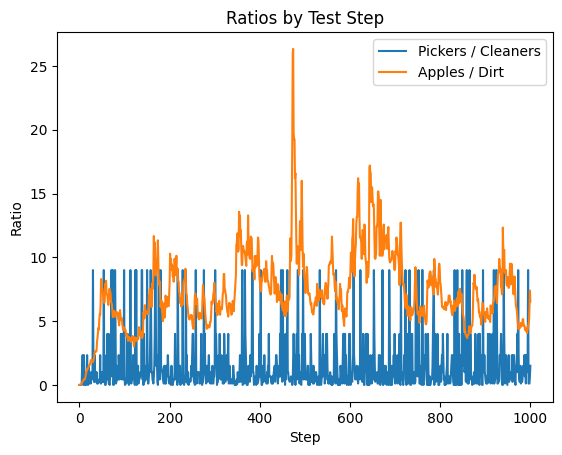

In [20]:
plt.figure()
plt.title("Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
episode = test_stats[0]
#plt.plot([episode['pickers'][i] / (episode['cleaners'][i] + 1e-1) for i in range(len(episode['pickers']))])

picker_cleaner_ratios = []
picker_cleaner_steps = []
for i, (num_pickers, num_cleaners) in enumerate(zip(episode['pickers'], episode['cleaners'])):
    if num_cleaners > 0:
        picker_cleaner_ratios.append(num_pickers / num_cleaners)
        picker_cleaner_steps.append(i)
print('average picker cleaner ratio', np.mean(picker_cleaner_ratios))
plt.plot(picker_cleaner_steps, picker_cleaner_ratios, label='Pickers / Cleaners')

apple_dirt_ratios = []
apple_dirt_steps = []
for i, (num_apples, num_dirt) in enumerate(zip(episode['num_apples'], episode['num_dirt'])):
    if num_dirt > 0:
        apple_dirt_ratios.append(num_apples / num_dirt)
        apple_dirt_steps.append(i)
plt.plot(apple_dirt_steps, apple_dirt_ratios, label='Apples / Dirt')
print('average apple dirt ratio', np.mean(apple_dirt_ratios))
plt.legend()
plt.show()

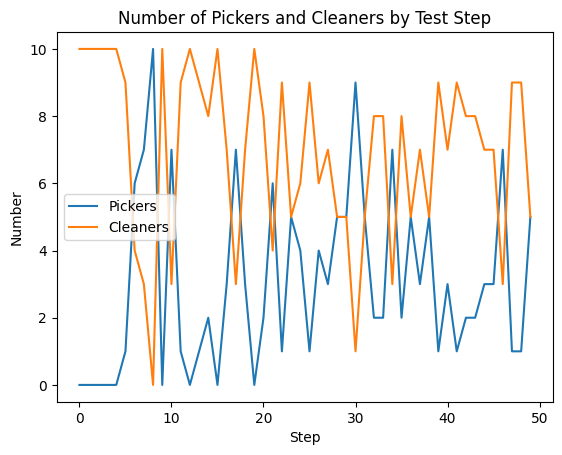

In [18]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'][:50], label="Pickers")
plt.plot(episode['cleaners'][:50], label="Cleaners")
plt.legend()
plt.show()